## Data Collection

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
# creating an empty list to collect all the reviews
reviews = []

# creating an empty list to collect rating stars
stars = []

# creating an empty list to collect dates
date = []

# creating an empty list to collect country
country = []

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    # Collecting review
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        try:
            reviews.append(para.text)
        except:
            print(f"Error on page{i} in reviews")
            reviews.append("None")
    
    print(f"   ---> {len(reviews)} total reviews")
    
    # Collecting no. of stars
    for para in parsed_content.find_all("div", {"class": "rating-10"}):
        try:
            stars.append(para.span.text)
        except:
            print(f"Error on page{i}")
            stars.append("None")
            
    print(f"   ---> {len(stars)} total stars")
    
    # Collecting date of review
    for para in parsed_content.find_all("time"):
        try:
            date.append(para.text)
        except:
            print(f"Error on page{i} in Date")
            date.append("None")
        
    
    print(f"   ---> {len(date)} total dates")
    
    # Collecting the country of the reviewer
    for para in parsed_content.find_all("h3"):
        try:
            country.append(para.span.next_sibling.text.strip(" ()"))
        except:
            print(f"Error on page{i} in Country")
            country.append("None")
        
        
    print(f"   ---> {len(country)} total countries")

Scraping page 1
   ---> 100 total reviews
   ---> 101 total stars
   ---> 100 total dates
   ---> 100 total countries
Scraping page 2
   ---> 200 total reviews
   ---> 202 total stars
   ---> 200 total dates
   ---> 200 total countries
Scraping page 3
   ---> 300 total reviews
   ---> 303 total stars
   ---> 300 total dates
   ---> 300 total countries
Scraping page 4
   ---> 400 total reviews
   ---> 404 total stars
   ---> 400 total dates
   ---> 400 total countries
Scraping page 5
   ---> 500 total reviews
   ---> 505 total stars
   ---> 500 total dates
   ---> 500 total countries
Scraping page 6
   ---> 600 total reviews
   ---> 606 total stars
   ---> 600 total dates
   ---> 600 total countries
Scraping page 7
   ---> 700 total reviews
   ---> 707 total stars
   ---> 700 total dates
   ---> 700 total countries
Scraping page 8
   ---> 800 total reviews
   ---> 808 total stars
   ---> 800 total dates
   ---> 800 total countries
Scraping page 9
   ---> 900 total reviews
   ---> 909 to

In [4]:
len(reviews)

1000

In [5]:
len(stars)

1010

In [6]:
len(date)

1000

In [7]:
len(country)

1000

In [8]:
stars = stars[:1000]

In [9]:
df = pd.DataFrame({"reviews":reviews,"stars":stars,"date":date,"country":country})
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | I booked our first out of c...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,8th June 2023,United States
1,✅ Trip Verified | My husband and I booked seat...,1,7th June 2023,United Kingdom
2,"Not Verified | May 3, flew from Seattle to He...",4,6th June 2023,United States
3,✅ Trip Verified | I went through three flights...,1,6th June 2023,Greece
4,✅ Trip Verified | An excellent flight in Club ...,2,6th June 2023,United Kingdom


In [10]:
df.shape

(1000, 4)

### Exporting the Data into csv format

In [11]:
import os

cwd = os.getcwd()
df.to_csv(cwd+ "/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Data Cleaning

In [12]:
import re

In [13]:
# Creating Verified binary column for Verified Trips

df['verified'] = df.reviews.str.contains("Trip Verified")
df['verified']

0       True
1       True
2      False
3       True
4       True
       ...  
995     True
996     True
997     True
998     True
999     True
Name: verified, Length: 1000, dtype: bool

In [14]:
df.head()

,reviews,stars,date,country,verified
0,✅ Trip Verified | I booked our first out of c...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,8th June 2023,United States,True
1,✅ Trip Verified | My husband and I booked seat...,1,7th June 2023,United Kingdom,True
2,"Not Verified | May 3, flew from Seattle to He...",4,6th June 2023,United States,False
3,✅ Trip Verified | I went through three flights...,1,6th June 2023,Greece,True
4,✅ Trip Verified | An excellent flight in Club ...,2,6th June 2023,United Kingdom,True


### Cleaning Reviews

In [15]:
# for lemmatization of words we use nltk library

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shukl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shukl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
df.reviews = df.reviews.str.strip('✅ Trip Verified |')
reviews_data = df.reviews.str.strip('Not Verified |')

# empty list to collect cleaned data corpus
corpus = []

# looping each review to remove punctuation, small case it, join it and add it to corpus

for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ',rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [18]:
df['corpus'] = corpus
df.head()

,reviews,stars,date,country,verified,corpus
0,I booked our first out of country trip to take...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,8th June 2023,United States,True,booked first country trip take husband surpris...
1,My husband and I booked seats within our premi...,1,7th June 2023,United Kingdom,True,husband booked seat within premium economy boo...
2,"Not Verified | May 3, flew from Seattle to He...",4,6th June 2023,United States,False,may flew seattle heathrow edinburgh ba lost go...
3,I went through three flights to reach my desti...,1,6th June 2023,Greece,True,went three flight reach destination ba flight ...
4,An excellent flight in Club World on British A...,2,6th June 2023,United Kingdom,True,excellent flight club world british airway wel...


### Cleaning/Formatting Dates

In [19]:
df.dtypes

reviews     object
stars       object
date        object
country     object
verified      bool
corpus      object
dtype: object

In [20]:
df.date = pd.to_datetime(df.date)
df.date.head()

0   2023-06-08
1   2023-06-07
2   2023-06-06
3   2023-06-06
4   2023-06-06
Name: date, dtype: datetime64[ns]

### Cleaning/Formatting ratings with stars

In [21]:
df.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '1', '4', '2', '9', '3', '10',
       '5', '7', '8', '6'], dtype=object)

In [22]:
df.stars = df.stars.str.strip('\n\t\t\t\t\t\t\t\t\t\t\t\t\t')
df.stars.value_counts()

1     318
2     115
10    103
3      95
9      82
8      73
5      62
4      58
7      55
6      39
Name: stars, dtype: int64

In [23]:
# converting object type to integer type 

df['stars'] = df['stars'].astype(str).astype(int)

In [24]:
# dropping the rows with 0 stars in ratings

df.drop(df[df.stars == 0].index, axis = 0, inplace = True)

In [25]:
df.stars.unique()

array([ 5,  1,  4,  2,  9,  3, 10,  7,  8,  6])

### Checking Null Values

In [26]:
df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     1000
dtype: int64

In [27]:
# resetting the index

df.reset_index(drop = True)

,reviews,stars,date,country,verified,corpus
0,I booked our first out of country trip to take...,5,2023-06-08,United States,True,booked first country trip take husband surpris...
1,My husband and I booked seats within our premi...,1,2023-06-07,United Kingdom,True,husband booked seat within premium economy boo...
2,"Not Verified | May 3, flew from Seattle to He...",4,2023-06-06,United States,False,may flew seattle heathrow edinburgh ba lost go...
3,I went through three flights to reach my desti...,1,2023-06-06,Greece,True,went three flight reach destination ba flight ...
4,An excellent flight in Club World on British A...,2,2023-06-06,United Kingdom,True,excellent flight club world british airway wel...
...,...,...,...,...,...,...
995,London Heathrow to Murcia and back. A few prob...,7,2018-07-29,China,True,london heathrow murcia back problem heathrow w...
996,London to Amsterdam. BA's service has gone not...,1,2018-07-28,United Kingdom,True,london amsterdam ba service gone notably downh...
997,Aberdeen to Abu Dhabi via London. Despite bein...,5,2018-07-27,United Kingdom,True,aberdeen abu dhabi via london despite gold mem...
998,Prague to Denver via London. I almost missed m...,8,2018-07-26,Czech Republic,True,prague denver via london almost missed flight ...


Now our data is cleaned and ready for data visualization and analysis

In [28]:
# exporting the cleaned data

df.to_csv(cwd+ "/cleaned_BA_reviews.csv")

### Exploratory Data Analysis

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

from wordcloud import WordCloud, STOPWORDS

**What is the average overall rating given for British Airways?**

In [30]:
df.stars.mean()

4.346

**What is the total counts for each rating?**

Text(0.5, 0.98, 'Counts for each Ratings')

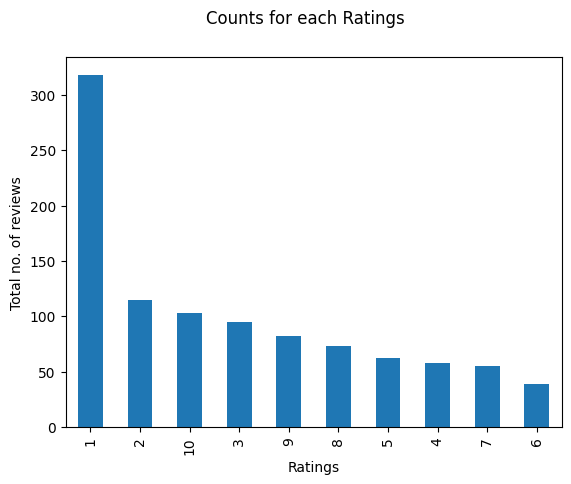

In [31]:
df.stars.value_counts().plot(kind = 'bar')
plt.xlabel("Ratings")
plt.ylabel("Total no. of reviews")
plt.suptitle("Counts for each Ratings")

In [32]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [33]:
# resetting index again so there is no confusion b/w the index and rating values

df_ratings = df_ratings.reset_index()
df_ratings

,index,stars,pct_values
0,1,318,31.8
1,2,115,11.5
2,10,103,10.3
3,3,95,9.5
4,9,82,8.2
5,8,73,7.3
6,5,62,6.2
7,4,58,5.8
8,7,55,5.5
9,6,39,3.9


In [34]:
# renaming columns 

df_ratings.rename(columns = {'index':'Stars','stars':'Total_counts'}, inplace = True)

In [35]:
df_ratings

,Stars,Total_counts,pct_values
0,1,318,31.8
1,2,115,11.5
2,10,103,10.3
3,3,95,9.5
4,9,82,8.2
5,8,73,7.3
6,5,62,6.2
7,4,58,5.8
8,7,55,5.5
9,6,39,3.9


Text(0.5, 1.0, 'Counts for each ratings')

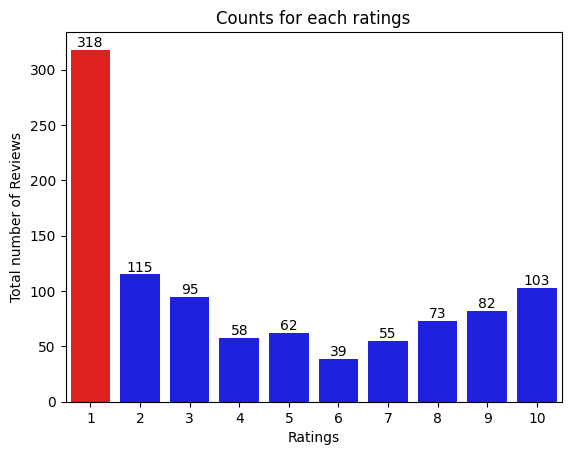

In [36]:
clrs = ['Red' if (x == max(df_ratings.Total_counts)) else 'blue' for x in df_ratings.Total_counts]
ax = sns.barplot(x = df_ratings.Stars, y = df_ratings.Total_counts, data = df_ratings, errwidth = 0, palette = clrs)

ax.bar_label(ax.containers[0])
ax.set_xlabel('Ratings')
ax.set_ylabel('Total number of Reviews')
ax.set_title('Counts for each ratings')

In [37]:
# Unique Countries from where BA recieved the reviews

print(f"{len(df.country.unique())} unique countries")

54 unique countries


**Which country most reviews come from?**

In [38]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [39]:
df_country_review.rename(columns = {'index':'Country','country':'Total_reviews'}, inplace = True)

Text(0.5, 1.0, 'Maximum number of reviews by country')

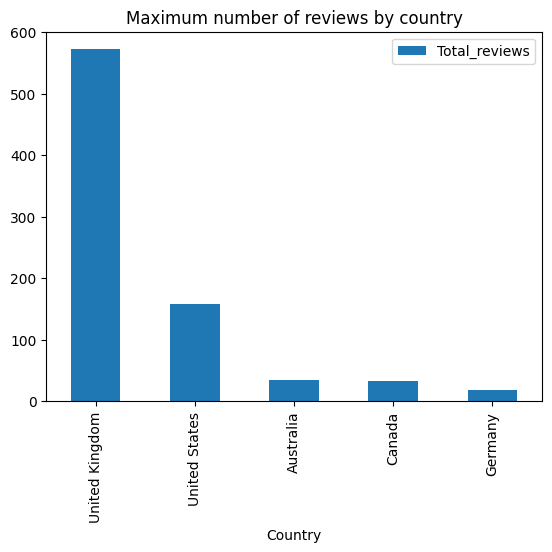

In [40]:
df_country_review.plot(kind = "bar", x = 'Country')
plt.title("Maximum number of reviews by country")

**Which country provided on average highest ratings?**

In [41]:
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending = False)).reset_index()

C:\Users\shukl\AppData\Local\Temp\ipykernel_2424\2935322440.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending = False)).reset_index()


In [42]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 10 Countries with avg highest rating provided to British Airways')

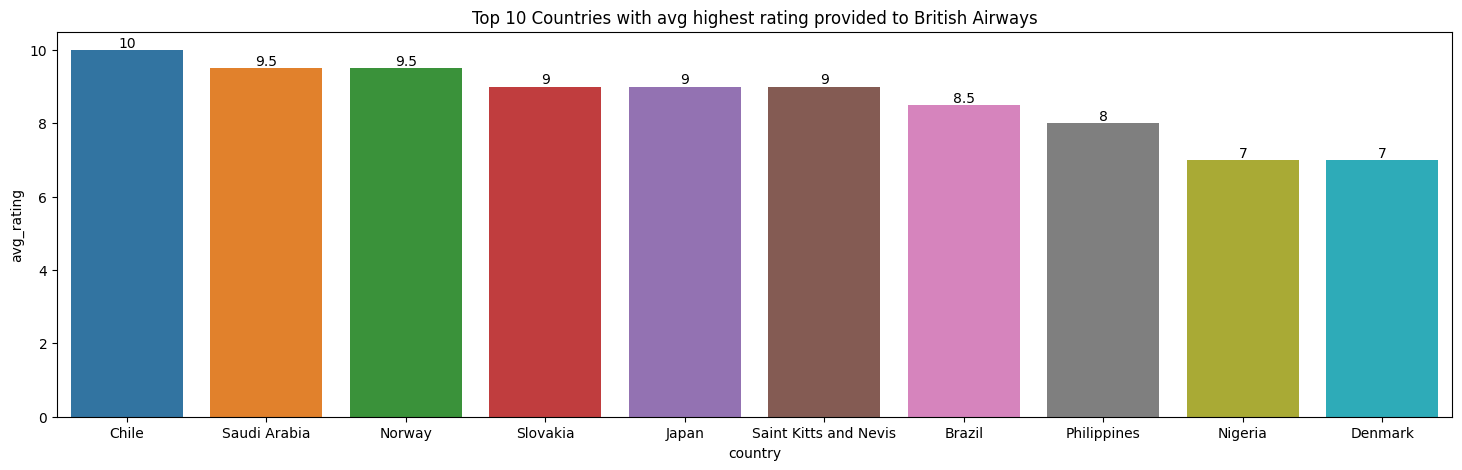

In [44]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:10])
ax.bar_label(ax.containers[0])
ax.set_title("Top 10 Countries with avg highest rating provided to British Airways")